In [3]:
import pandas as pd
from sodapy import Socrata
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import contextily as ctx
#link : "https://raw.githubusercontent.com/greysonchung/New-York-Taxi-Data-Analysis/main/code/visualisation.ipynb"

In [4]:
client = Socrata("data.cityofnewyork.us",
                  "ZSiYtf39dzKYQQwoQWlfJ4B8h",
                  username="aymen.b.aicha@gmail.com",
                  password="*Alya1312*")
def fetch_data(data:str):
    results = client.get(data, limit=10000)
    return(results)
green_orginal_df = pd.DataFrame.from_records(fetch_data("2upf-qytp"))
green_results_df= green_orginal_df.copy()
#int erkennung
green_results_df["passenger_count"] = pd.to_numeric(green_results_df["passenger_count"],errors='raise')
green_results_df["vendorid"] = pd.to_numeric(green_results_df["vendorid"],errors='raise')
green_results_df["vendorid"] = pd.to_numeric(green_results_df["vendorid"],errors='raise')
green_results_df["pulocationid"] = pd.to_numeric(green_results_df["pulocationid"],errors='raise')
green_results_df["dolocationid"] = pd.to_numeric(green_results_df["dolocationid"],errors='raise')

#float erkennung
green_results_df["trip_distance"] = pd.to_numeric(green_results_df["trip_distance"],errors='raise')
green_results_df["fare_amount"] = pd.to_numeric(green_results_df["fare_amount"],errors='raise')
green_results_df["extra"] = pd.to_numeric(green_results_df["extra"],errors='raise')
green_results_df["mta_tax"] = pd.to_numeric(green_results_df["mta_tax"],errors='raise')
green_results_df["tip_amount"] = pd.to_numeric(green_results_df["tip_amount"],errors='raise')
green_results_df["improvement_surcharge"] = pd.to_numeric(green_results_df["improvement_surcharge"],errors='raise')
green_results_df["total_amount"] = pd.to_numeric(green_results_df["total_amount"],errors='raise')
green_results_df["congestion_surcharge"] = pd.to_numeric(green_results_df["congestion_surcharge"],errors='raise')
green_results_df["tolls_amount"] = pd.to_numeric(green_results_df["congestion_surcharge"],errors='raise')

#date erkennung
green_results_df['tpep_pickup_datetime']= pd.to_datetime(green_results_df['tpep_pickup_datetime'],errors='raise')
green_results_df['tpep_dropoff_datetime']= pd.to_datetime(green_results_df['tpep_dropoff_datetime'],errors='raise')



In [5]:
green_results_df

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-02-25 12:44:03,2019-02-25 12:56:17,5,1.28,1,N,170,230,1,9.0,0.0,0.5,3.08,2.5,0.3,15.38,2.5
1,1,2019-02-25 12:45:33,2019-02-25 13:03:51,2,3.00,1,N,230,125,2,13.5,2.5,0.5,0.00,2.5,0.3,16.80,2.5
2,2,2019-02-25 12:01:44,2019-02-25 12:14:28,2,1.01,1,N,234,170,1,9.0,0.0,0.5,1.00,2.5,0.3,13.30,2.5
3,2,2019-02-25 12:16:30,2019-02-25 12:31:33,2,1.85,1,N,170,68,1,10.5,0.0,0.5,1.38,2.5,0.3,15.18,2.5
4,2,2019-02-25 12:54:49,2019-02-25 13:08:36,2,1.12,1,N,161,163,1,9.5,0.0,0.5,3.84,2.5,0.3,16.64,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,2019-02-25 13:40:55,2019-02-25 13:48:46,1,0.81,1,N,236,237,2,6.5,0.0,0.5,0.00,2.5,0.3,9.80,2.5
9996,1,2019-02-25 13:10:52,2019-02-25 13:21:09,1,2.30,1,N,229,143,1,9.5,2.5,0.5,2.55,2.5,0.3,15.35,2.5
9997,1,2019-02-25 13:33:09,2019-02-25 13:44:20,1,1.50,1,N,142,237,1,9.0,2.5,0.5,2.45,2.5,0.3,14.75,2.5
9998,1,2019-02-25 13:58:36,2019-02-25 14:05:12,1,0.50,1,N,170,234,2,6.0,2.5,0.5,0.00,2.5,0.3,9.30,2.5


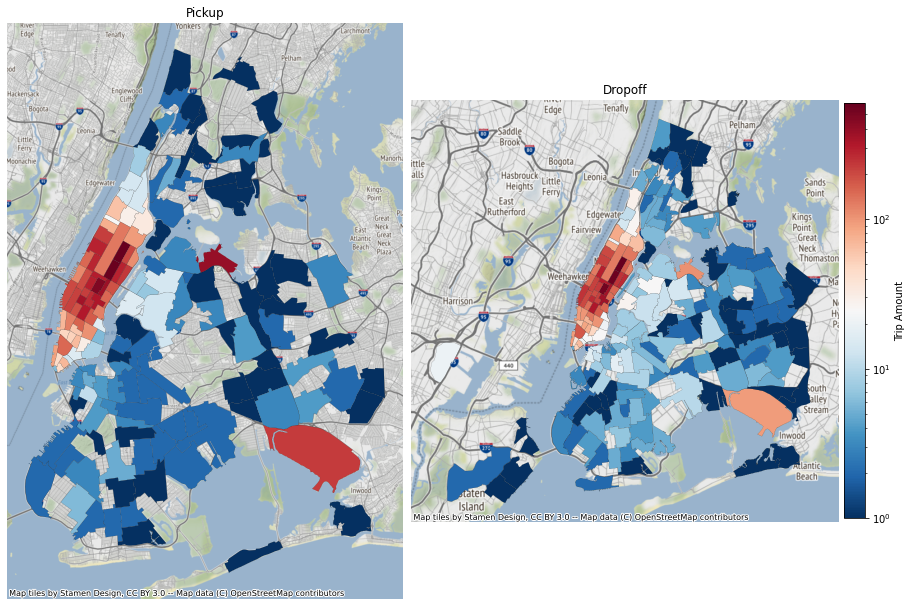

In [6]:
# Identify pickup and dropoff borough
zone_df = pd.read_csv('taxi+_zone_lookup.csv')
data = pd.DataFrame(pd.merge(green_results_df, zone_df[['LocationID', 'Borough']], left_on='pulocationid', right_on='LocationID')).drop('LocationID', axis=1)
data = data.rename({'Borough':'PUborough'}, axis=1)
data = pd.DataFrame(pd.merge(data, zone_df[['LocationID', 'Borough']], left_on='dolocationid', right_on='LocationID')).drop('LocationID', axis=1)
data = data.rename({'Borough':'DOborough'}, axis=1)
countries_gdf = gpd.read_file('taxi_zones/taxi_zones.shp')
zone = pd.read_csv('taxi+_zone_lookup.csv')
countries_gdf['geometry'] = countries_gdf['geometry'].to_crs('+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs')
pu_zone = green_results_df.groupby(['pulocationid'], as_index=False).size()
do_zone = green_results_df.groupby(['dolocationid'], as_index=False).size()
do_zone = gpd.GeoDataFrame(pd.merge(do_zone, countries_gdf, left_on='dolocationid', right_on='LocationID')).drop('LocationID', axis=1)
pu_zone = gpd.GeoDataFrame(pd.merge(pu_zone, countries_gdf, left_on='pulocationid', right_on='LocationID')).drop('LocationID', axis=1)
pu_zone = pu_zone.to_crs(epsg=3857)
do_zone = do_zone.to_crs(epsg=3857)
# plot geospatial visualisation to compare pickup and dropoff amount from each zone
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.09, right=0.8, wspace=0.02, hspace=0.02)
# create a normalized colorbar
vmin, vmax = pu_zone['size'].min(), pu_zone['size'].max()
axs[0] = pu_zone.plot(column='size', linewidth=0.09, edgecolor='k', figsize=(10, 10),
    norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap='RdBu_r', legend=False, ax=axs[0]) 
ctx.add_basemap(axs[0])
vmin, vmax = do_zone['size'].min(), do_zone['size'].max()
axs[1] = do_zone.plot(column='size', linewidth=0.1, edgecolor='k', figsize=(10, 10),
    norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap='RdBu_r', legend=False, ax=axs[1])
ctx.add_basemap(axs[1])
axs[0].set_title('Pickup')
axs[1].set_title('Dropoff')
axs[0].set_axis_off()
axs[1].set_axis_off()
# draw the color bar
patch_col = axs[0].collections[0]
cb = fig.colorbar(patch_col, ax=axs, shrink=0.72, orientation="vertical", pad=0.005)
cb.ax.set_ylabel('Trip Amount')
plt.show()
